In [25]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [26]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [27]:
import netCDF4 as nc
# import sys
# sys.path.append('/data/tjarniko/mocsy')
# import mocsy
import numpy as np

#import gsw
import arrow
import glob
import cmocean as cm
import matplotlib.pyplot as plt

from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

## Purpose of notebook

Here I'm going to first plot your stations on a map, and then visualise the timeseries you're interested in.




#### TJSJ let's make a dict with placenames, colors, and then code a map to visualise the stations

In [28]:
PLACES = {
'Deep Bay': {
    
'lon lat': (-124.7392, 49.4606),

'color': 'red', 'NEMO grid ji': (599, 126),

},

'Southern Baynes': {

'lon lat': (-124.7457, 49.4760),

'color': 'sienna', 'NEMO grid ji': (602, 127),

},

'Northern Baynes': {

'lon lat': (-124.8924, 49.6492),

'color': 'orange', 'NEMO grid ji': (646, 127),

},

'Fanny Bay': {

'lon lat': (-124.8227, 49.5086),

'color': 'gold', 'NEMO grid ji': (614, 120),

},

'Maple Bay': {

'lon lat': (-123.5947, 48.8140),

'color': 'olivedrab', 'NEMO grid ji': (392, 213),

},

'Salt Spring': {

'lon lat': (-123.5513, 48.7993),

'color': 'lightgreen', 'NEMO grid ji': (386, 218),

},

'Nanoose Bay': {

'lon lat': (-124.1359, 49.2609),

'color': 'turquoise', 'NEMO grid ji': (517, 190),

},

'Lasqueti Island': {

# deg E, deg N

'lon lat': (-124.3384, 49.5442),

'color': 'dodgerblue', 'NEMO grid ji': (586, 195),

},

'Main SoG': {

'lon lat': (-123.5832, 49.1177),

'color': 'slategray', 'NEMO grid ji': (450, 253),

},

'Cortes/Marina': {

'lon lat': (-125.0194, 50.0418),

'color': 'royalblue', 'NEMO grid ji': (732, 157),

},

'Lund/Desolation Sound': {

'lon lat': (-124.7666, 49.9804),

'color': 'darkviolet', 'NEMO grid ji': (702, 187),

},

'Mouth of Okeover': {

'lon lat': (-124.8174, 50.0805),

'color': 'pink', 'NEMO grid ji': (726, 192),

},
}

list_places = ['Deep Bay', 'Southern Baynes', 'Northern Baynes', \
               'Fanny Bay', 'Maple Bay', 'Salt Spring', 'Nanoose Bay',\
               'Lasqueti Island', 'Main SoG', 'Cortes/Marina', \
               'Lund/Desolation Sound', 'Mouth of Okeover']

#### map plotting code

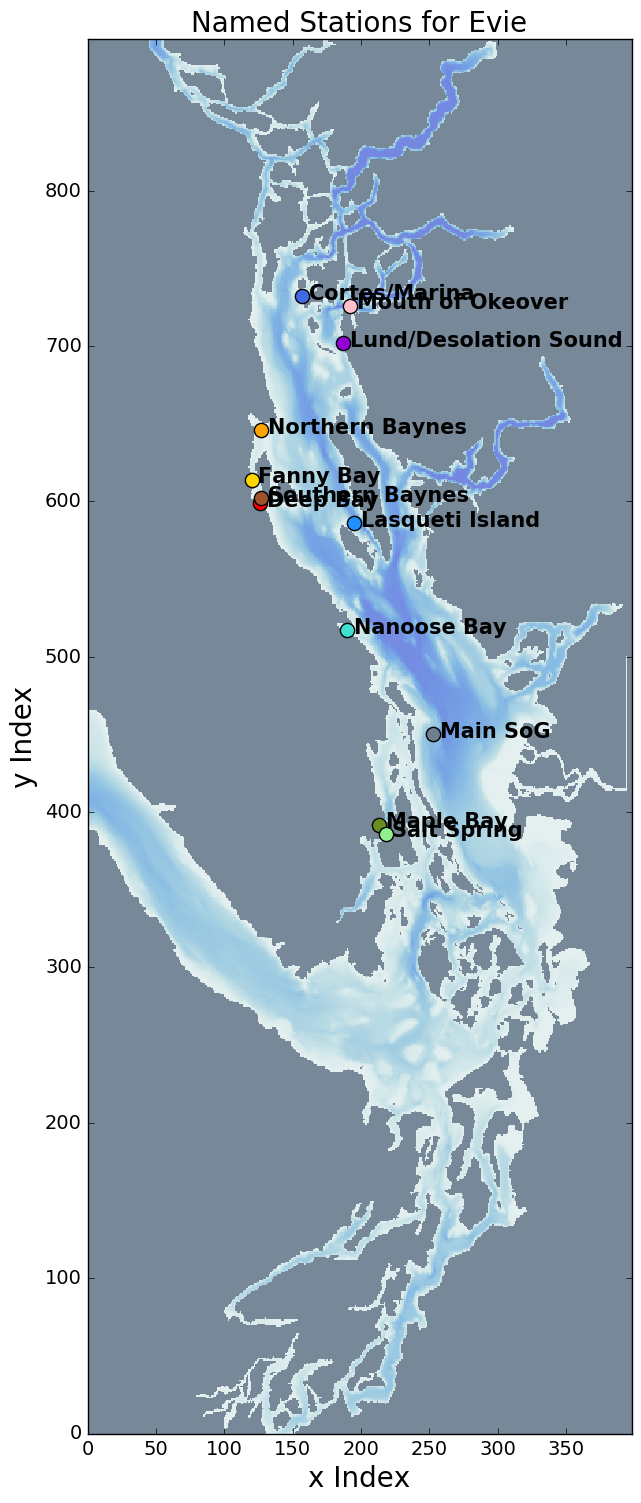

In [29]:
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def wshed_plot(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    
    for i in range(0,len(list_places)):
        t_place = list_places[i]
        tj = PLACES[t_place]['NEMO grid ji'][1]
        ti = PLACES[t_place]['NEMO grid ji'][0]
        col = PLACES[t_place]['color']
        pts = ax.scatter(tj,ti,s=105,c=col,marker='o')
        ax.text(tj+5,ti-2,t_place, weight = 'bold', fontsize = 15)

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    
fact = 0.6
wshed_plot(bath1,'Named Stations for Evie', \
               cm.cm.dense,20*fact,30*fact,0,1000,'bathymetry','')

## Plots of pH, OmA, and OmC for a given year for all stations

In [30]:
t_year = '2014'
filename = './EXTRACTED_timeseries/pHOm_timeseries_' + t_year + '.nc'
t_nc = nc.Dataset(filename)

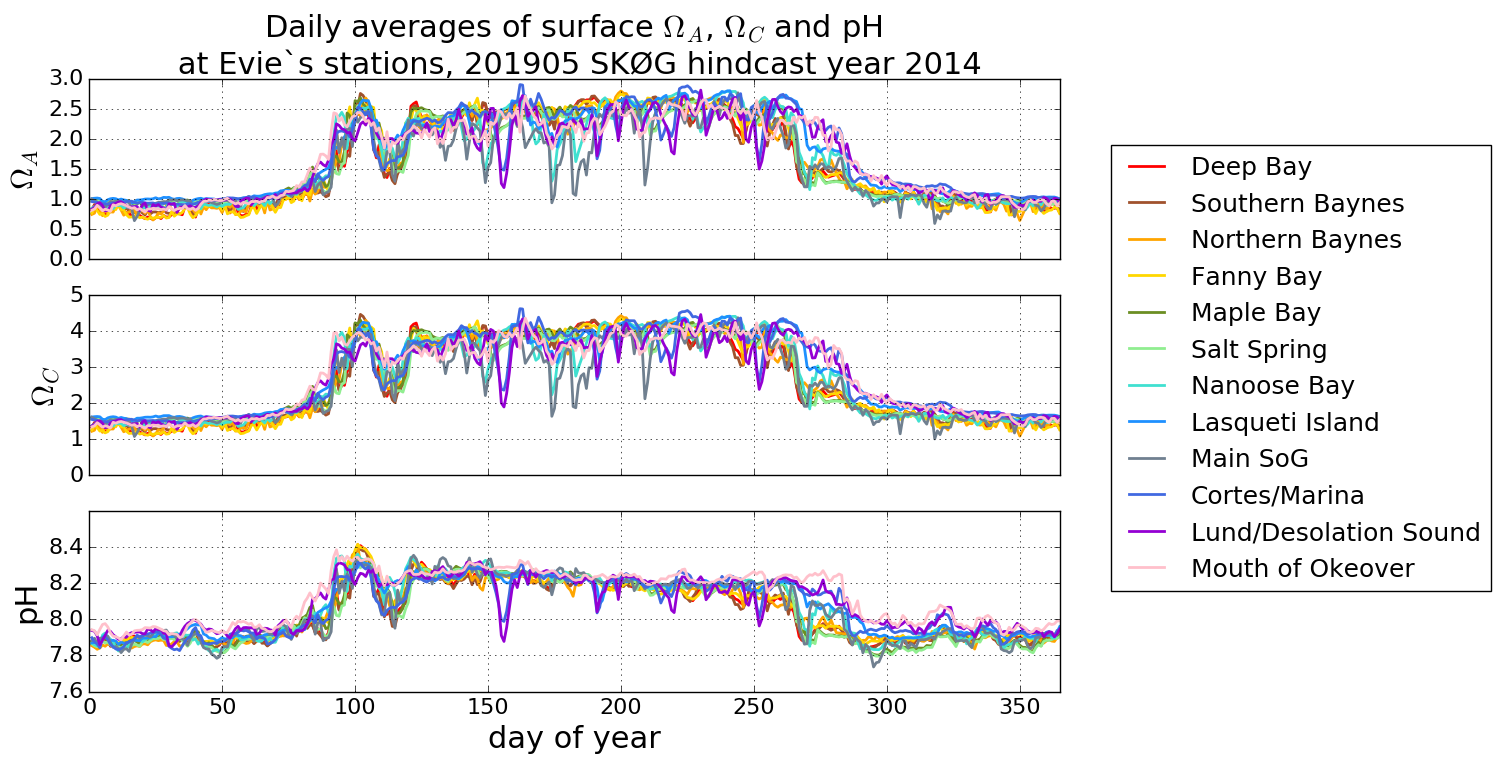

In [31]:
fact = 0.9
mons = np.arange(1,366,1)
fig = plt.figure(figsize=(12*fact,8.5*fact))

ax1 = fig.add_subplot(3,1,1)
for i in range(0,len(list_places)):
    stn = list_places[i]
    ax1.plot(mons,t_nc[stn]['OmA_timeseries'][0,:], \
             color = PLACES[stn]['color'], linewidth = 2, label = stn)
    ax1.set_ylim([0,3])
    ax1.set_xlim([0,365])
    ax1.set_xticklabels([])
    ax1.set_ylabel('$\Omega_A$', fontsize = 22)
    
    
plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid()
plt.title('Daily averages of surface $\Omega_A$, $\Omega_C$ and pH \n at Evie`s stations, 201905 SKØG hindcast year ' +t_year , fontsize = 22)

ax2 = fig.add_subplot(3,1,2)
for i in range(0,len(list_places)):
    stn = list_places[i]
    ax2.plot(mons,t_nc[stn]['OmC_timeseries'][0,:], \
             color = PLACES[stn]['color'], linewidth = 2, label = stn)
    ax2.set_ylim([0,5])
    ax2.set_xlim([0,365])
    ax2.set_xticklabels([])
    ax2.set_ylabel('$\Omega_C$', fontsize = 22)

plt.grid()
plt.tick_params(axis='both', which='major', labelsize=16)

ax3 = fig.add_subplot(3,1,3)
for i in range(0,len(list_places)):
    stn = list_places[i]
    ax3.plot(mons,t_nc[stn]['pH_timeseries'][0,:], color = PLACES[stn]['color'], linewidth = 2 )
    ax3.set_ylim([7.6,8.6])
    ax3.set_xlim([0,365])
    ax3.set_ylabel('pH', fontsize = 22)
    ax3.set_xlabel('day of year', fontsize = 22)

plt.grid()
plt.tight_layout()

plt.tick_params(axis='both', which='major', labelsize=16)


## Now let's make the same plot, but for a single station, for all 4 years, with some thresholding code (how many days were under a given value for a given year at this station?)

In [32]:
# list_places = ['Deep Bay', 'Southern Baynes', 'Northern Baynes', \
#                'Fanny Bay', 'Maple Bay', 'Salt Spring', 'Nanoose Bay',\
#                'Lasqueti Island', 'Main SoG', 'Cortes/Marina', \
#                'Lund/Desolation Sound', 'Mouth of Okeover']

stn = 'Southern Baynes'
OmA_thres = 1.0
OmC_thres = 1.5
pH_thres = 7.9

In [33]:

t_nc2013 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2013.nc')
t_nc2014 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2014.nc')
t_nc2015 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2015.nc')
t_nc2016 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2016.nc')

In [34]:
OmA_2013 = t_nc2013[stn]['OmA_timeseries'][0,:]
OmA_2014 = t_nc2014[stn]['OmA_timeseries'][0,:]
OmA_2015 = t_nc2015[stn]['OmA_timeseries'][0,:]
OmA_2016 = t_nc2016[stn]['OmA_timeseries'][0,:]
thres_OmA_line = np.zeros_like(OmA_2013)
thres_OmA_line[:] = OmA_thres

OmC_2013 = t_nc2013[stn]['OmC_timeseries'][0,:]
OmC_2014 = t_nc2014[stn]['OmC_timeseries'][0,:]
OmC_2015 = t_nc2015[stn]['OmC_timeseries'][0,:]
OmC_2016 = t_nc2016[stn]['OmC_timeseries'][0,:]
thres_OmC_line = np.zeros_like(OmC_2013)
thres_OmC_line[:] = OmC_thres

pH_2013 = t_nc2013[stn]['pH_timeseries'][0,:]
pH_2014 = t_nc2014[stn]['pH_timeseries'][0,:]
pH_2015 = t_nc2015[stn]['pH_timeseries'][0,:]
pH_2016 = t_nc2016[stn]['pH_timeseries'][0,:]
thres_pH_line = np.zeros_like(pH_2013)
thres_pH_line[:] = pH_thres

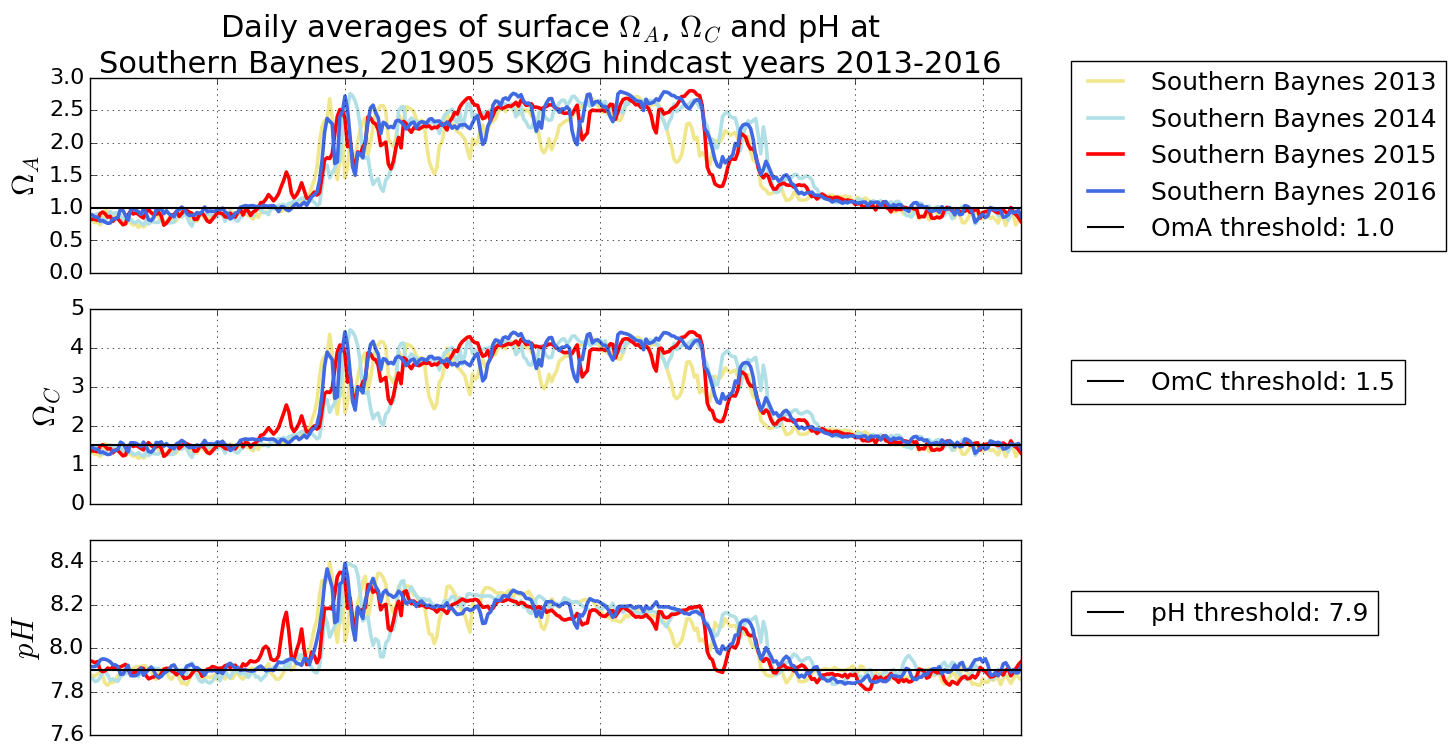

In [35]:
#powder blue , cobalt , red dirty yellow



fact = 0.9
lw = 2.6
mons = np.arange(1,366,1)
fig = plt.figure(figsize=(12*fact,8.5*fact))

ax1 = fig.add_subplot(3,1,1)

ax1.plot(mons,OmA_2013, color = 'khaki', linewidth = lw, label = stn + ' 2013' )
ax1.plot(mons,OmA_2014, color = 'powderblue', linewidth = lw, label = stn + ' 2014' )
ax1.plot(mons,OmA_2015, color = 'red', linewidth = lw, label = stn + ' 2015' )
ax1.plot(mons,OmA_2016, color = 'royalblue', linewidth = lw, label = stn + ' 2016' )
ax1.plot(mons,thres_OmA_line, color = 'black', linewidth = 1.5, label = 'OmA threshold: '+ str(OmA_thres))
ax1.set_ylim([0,3])
ax1.set_xlim([0,365])
ax1.set_xticklabels([])
ax1.set_ylabel('$\Omega_A$', fontsize = 22)
plt.grid()    
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(bbox_to_anchor=(1.04,1.15), loc="upper left", fontsize = 18)

plt.title('Daily averages of surface $\Omega_A$, $\Omega_C$ and pH at  \n' +stn + ', 201905 SKØG hindcast years 2013-2016 ', fontsize = 22)

ax2 = fig.add_subplot(3,1,2)

ax2.plot(mons,OmC_2013, color = 'khaki', linewidth = lw)
ax2.plot(mons,OmC_2014, color = 'powderblue', linewidth = lw )
ax2.plot(mons,OmC_2015, color = 'red', linewidth = lw)
ax2.plot(mons,OmC_2016, color = 'royalblue', linewidth = lw )
ax2.plot(mons,thres_OmC_line, color = 'black', linewidth = 1.5, label = 'OmC threshold: '+ str(OmC_thres))
ax2.set_ylim([0,5])
ax2.set_xlim([0,365])
ax2.set_xticklabels([])
ax2.set_ylabel('$\Omega_C$', fontsize = 22)
plt.grid()    
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(bbox_to_anchor=(1.04,0.8), loc="upper left", fontsize = 18)

ax3 = fig.add_subplot(3,1,3)

ax3.plot(mons,pH_2013, color = 'khaki', linewidth = lw)
ax3.plot(mons,pH_2014, color = 'powderblue', linewidth = lw )
ax3.plot(mons,pH_2015, color = 'red', linewidth = lw)
ax3.plot(mons,pH_2016, color = 'royalblue', linewidth = lw )
ax3.plot(mons,thres_pH_line, color = 'black', linewidth = 1.5, label = 'pH threshold: '+ str(pH_thres))
ax3.set_ylim([7.6,8.5])
ax3.set_xlim([0,365])
ax3.set_xticklabels([])
ax3.set_ylabel('$pH$', fontsize = 22)
plt.grid()    
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(bbox_to_anchor=(1.04,0.8), loc="upper left", fontsize = 18)

plt.tight_layout()

plt.tick_params(axis='both', which='major', labelsize=16)


## some thresholding code

In [36]:

crit_OmA_13 = np.size(OmA_2013[OmA_2013<OmA_thres])
crit_OmA_14 = np.size(OmA_2013[OmA_2014<OmA_thres])
crit_OmA_15 = np.size(OmA_2013[OmA_2015<OmA_thres])
crit_OmA_16 = np.size(OmA_2013[OmA_2015<OmA_thres])

print('In 2013 at '+stn+', '+str(crit_OmA_13)+' days were below the Omega A threshold of '+str(OmA_thres)+'.' )
print('In 2014 at '+stn+', '+str(crit_OmA_14)+' days were below the Omega A threshold of '+str(OmA_thres)+'.' )
print('In 2015 at '+stn+', '+str(crit_OmA_15)+' days were below the Omega A threshold of '+str(OmA_thres)+'.' )
print('In 2016 at '+stn+', '+str(crit_OmA_16)+' days were below the Omega A threshold of '+str(OmA_thres)+'.' )
print()

crit_OmC_13 = np.size(OmC_2013[OmC_2013<OmC_thres])
crit_OmC_14 = np.size(OmC_2013[OmC_2014<OmC_thres])
crit_OmC_15 = np.size(OmC_2013[OmC_2015<OmC_thres])
crit_OmC_16 = np.size(OmC_2013[OmC_2015<OmC_thres])

print('In 2013 at '+stn+', '+str(crit_OmC_13)+' days were below the Omega C threshold of '+str(OmC_thres)+'.' )
print('In 2014 at '+stn+', '+str(crit_OmC_14)+' days were below the Omega C threshold of '+str(OmC_thres)+'.' )
print('In 2015 at '+stn+', '+str(crit_OmC_15)+' days were below the Omega C threshold of '+str(OmC_thres)+'.' )
print('In 2016 at '+stn+', '+str(crit_OmC_16)+' days were below the Omega C threshold of '+str(OmC_thres)+'.' )
print()

crit_pH_13 = np.size(pH_2013[pH_2013<pH_thres])
crit_pH_14 = np.size(pH_2013[pH_2014<pH_thres])
crit_pH_15 = np.size(pH_2013[pH_2015<pH_thres])
crit_pH_16 = np.size(pH_2013[pH_2015<pH_thres])

print('In 2013 at '+stn+', '+str(crit_pH_13)+' days were below the pH threshold of '+str(pH_thres)+'.' )
print('In 2014 at '+stn+', '+str(crit_pH_14)+' days were below the pH threshold of '+str(pH_thres)+'.' )
print('In 2015 at '+stn+', '+str(crit_pH_15)+' days were below the pH threshold of '+str(pH_thres)+'.' )
print('In 2016 at '+stn+', '+str(crit_pH_16)+' days were below the pH threshold of '+str(pH_thres)+'.' )
print()

In 2013 at Southern Baynes, 127 days were below the Omega A threshold of 1.0.
In 2014 at Southern Baynes, 110 days were below the Omega A threshold of 1.0.
In 2015 at Southern Baynes, 113 days were below the Omega A threshold of 1.0.
In 2016 at Southern Baynes, 113 days were below the Omega A threshold of 1.0.

In 2013 at Southern Baynes, 93 days were below the Omega C threshold of 1.5.
In 2014 at Southern Baynes, 80 days were below the Omega C threshold of 1.5.
In 2015 at Southern Baynes, 62 days were below the Omega C threshold of 1.5.
In 2016 at Southern Baynes, 62 days were below the Omega C threshold of 1.5.

In 2013 at Southern Baynes, 141 days were below the pH threshold of 7.9.
In 2014 at Southern Baynes, 126 days were below the pH threshold of 7.9.
In 2015 at Southern Baynes, 110 days were below the pH threshold of 7.9.
In 2016 at Southern Baynes, 110 days were below the pH threshold of 7.9.

